In [282]:
#Librairies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels as sm

import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model

import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

In [283]:
#On importe les données manuellement

data= pd.read_csv("./input/adult.csv")
df= pd.DataFrame(data)

In [284]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On procède au nettoyage de données

In [286]:
print(set(data['occupation']))
data['occupation'] = data['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)


{'Exec-managerial', 'Transport-moving', 'Tech-support', 'Machine-op-inspct', 'Other-service', '?', 'Sales', 'Craft-repair', 'Prof-specialty', 'Farming-fishing', 'Priv-house-serv', 'Protective-serv', 'Adm-clerical', 'Armed-Forces', 'Handlers-cleaners'}


In [287]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [288]:
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [289]:
data['race'] = data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [290]:
data['marital.status'] = data['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [291]:
df.occupation.replace(0, np.nan, inplace=True)

In [292]:
print(df.shape)
df=df.dropna()
print(df.shape)

(32561, 15)
(30718, 15)


In [293]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,1,7.0,Not-in-family,3,1,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,4,6.0,Unmarried,3,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,3,5.0,Own-child,3,1,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,4,13.0,Unmarried,3,1,0,3770,45,United-States,0
6,38,Private,150601,10th,6,3,3.0,Unmarried,3,0,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,5,5.0,Other-relative,3,1,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,4,5.0,Not-in-family,3,1,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,5,9.0,Unmarried,3,0,0,3004,60,?,1
10,45,Private,172274,Doctorate,16,4,5.0,Unmarried,0,1,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,Prof-school,15,5,5.0,Not-in-family,3,0,0,2824,45,United-States,1


# Visualisation de données

#### Analyse des données

Nous allons plotter chaque feature afin de mieux comprendre notre jeu de données.

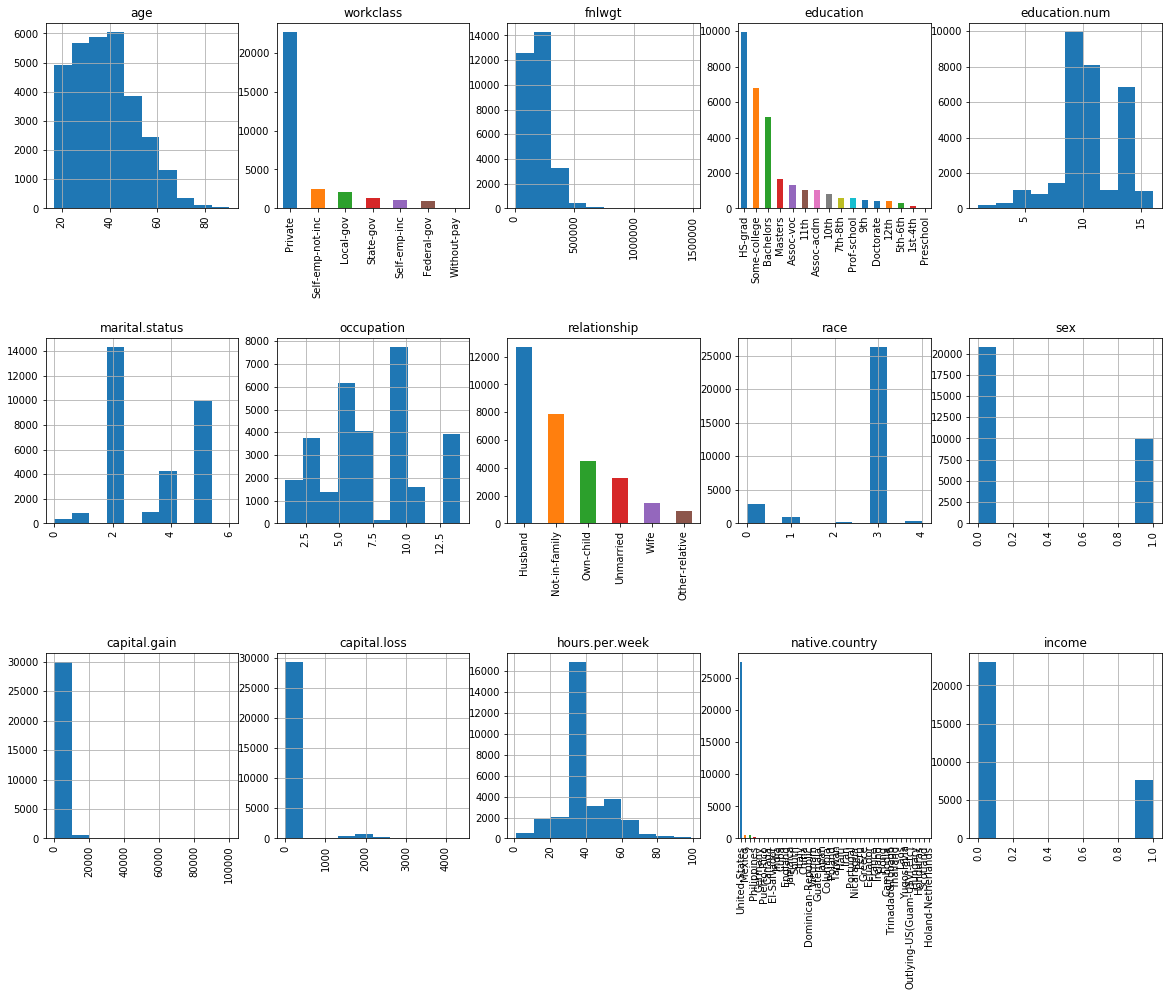

In [294]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

On s'aperçoit que les données sont principalements localisées aux Etats-Unis. 
Particulièrement d'hommes blancs.

In [295]:
(data["native.country"].value_counts() / data.shape[0]).head()

United-States    0.895857
Mexico           0.019748
?                0.017905
Philippines      0.006081
Germany          0.004207
Name: native.country, dtype: float64

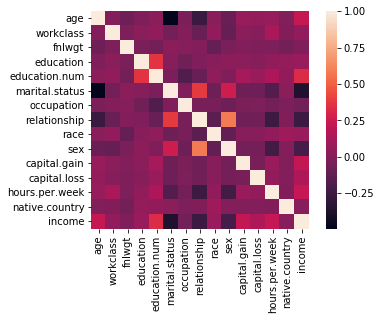

In [296]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

Ainsi on peut s'apercevoir d'une forte correlation entre Education et Education-Num

In [297]:
del data["education"]

Les deux colonnes représentent la même feature mais on préférera garder les nombres qui sont ordonnées et parlant. Plus le nombre est elevé plus la personne est "éduquée".

#### On observe la matrice de corrélation entre les variables numériques.

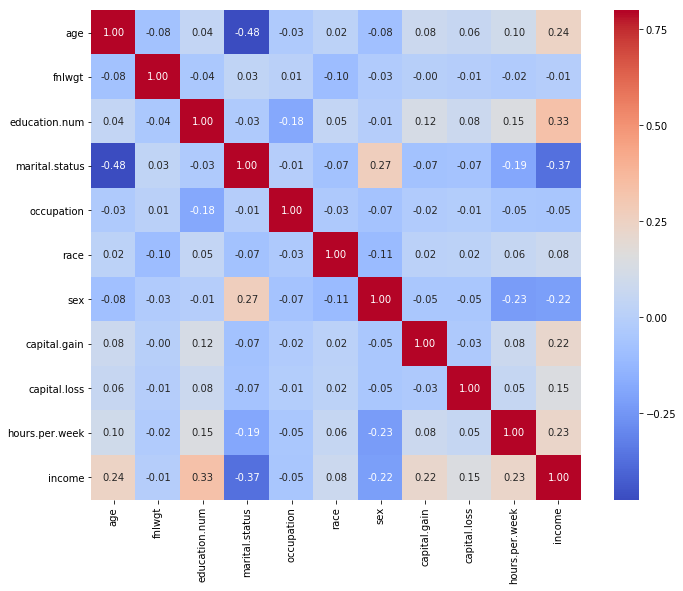

In [298]:
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True, fmt = ".2f", cmap="coolwarm", square=True);

#### Exploration de données:

###### Education Num vs Income

C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


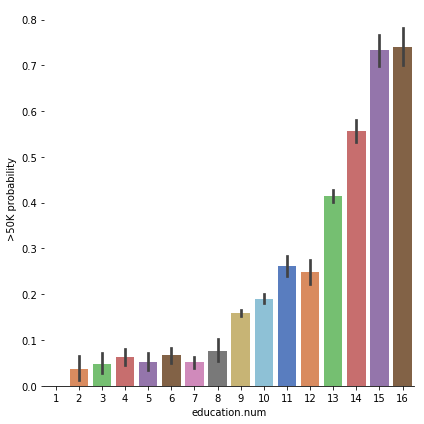

In [299]:
g = sns.factorplot(x="education.num",y="income",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

###### Hours Per Week vs Income

C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


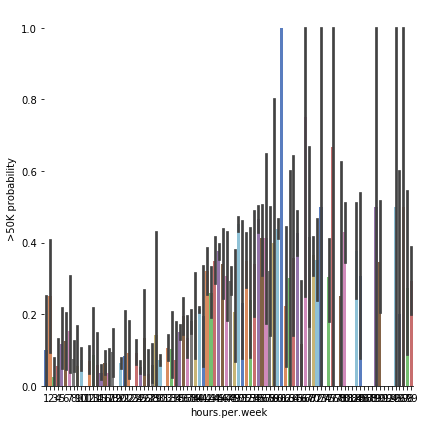

In [300]:
g  = sns.factorplot(x="hours.per.week",y="income",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

###### Age vs Income

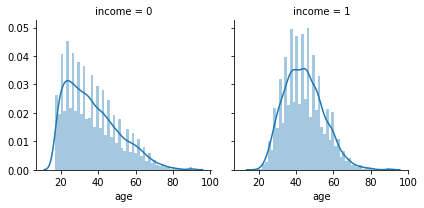

In [301]:
g = sns.FacetGrid(data, col='income')
g = g.map(sns.distplot, "age")

In [302]:
# Fill Missing Category Entries
#data["workclass"] = data["workclass"].fillna("X")
#data["occupation"] = data["occupation"].fillna("X")
#data["native.country"] = data["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
#data.isnull().sum()

###### Native Nation vs Income

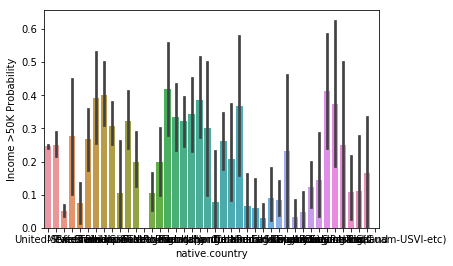

In [303]:
g = sns.barplot(x="native.country",y="income",data=data)
g = g.set_ylabel("Income >50K Probability")

###### Sex vs Income

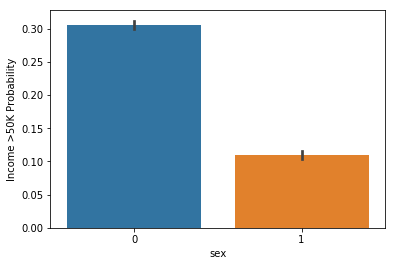

In [304]:
g = sns.barplot(x="sex",y="income",data=data)
g = g.set_ylabel("Income >50K Probability")

###### Relationship vs Income

C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


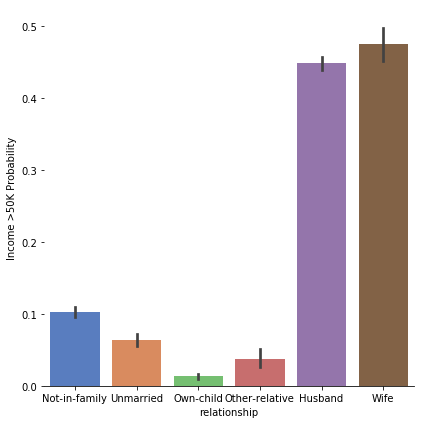

In [305]:
g = sns.factorplot(x="relationship",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

###### Marital Status vs Income

C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


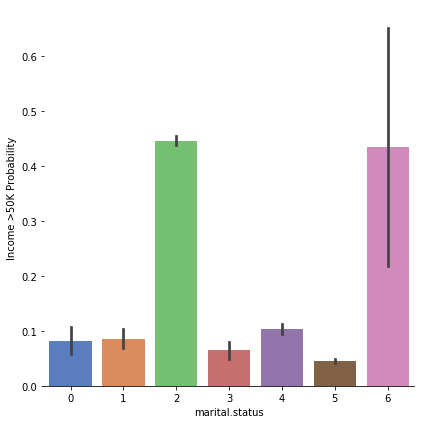

In [306]:
g = sns.factorplot(x="marital.status",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

###### Workclass vs Income

C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


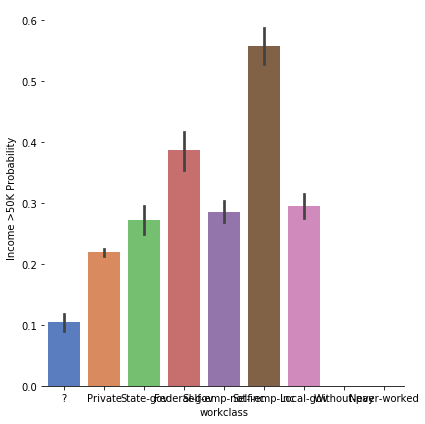

In [307]:
g = sns.factorplot(x="workclass",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

### Feature Engineering

In [308]:
# Convert Sex value to 0 and 1
data["sex"] = data["sex"].map({"Male": 0, "Female":1})

In [309]:
# Create Married Column - Binary Yes(1) or No(0)
data["marital.status"] = data["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data["marital.status"] = data["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data["marital.status"] = data["marital.status"].map({"Married":1, "Single":0})
#data["marital.status"] = data["marital.status"].astype(int)

In [310]:
# Drop the data you don't want to use
data.drop(labels=["workclass","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(data.head())

Dataset with Dropped Labels
   age  fnlwgt  education.num  marital.status  sex  capital.gain  \
0   90   77053              9             NaN  NaN             0   
1   82  132870              9             NaN  NaN             0   
2   66  186061             10             NaN  NaN             0   
3   54  140359              4             NaN  NaN             0   
4   41  264663             10             NaN  NaN             0   

   capital.loss  hours.per.week  income  
0          4356              40       0  
1          4356              18       0  
2          4356              40       0  
3          3900              40       0  
4          3900              40       0  


#### On s'aperçoit que

Les hommes gagnent en moyenne plus que les femmes.
L'enseignement supérieur peut générer des revenus plus élevés..
Les Asiatiques du Pacifique et les Blancs sont deux races qui ont le revenu moyen le plus élevé.
Les citoyens mariés avec un conjoint ont plus de chances de gagner plus que ceux qui ne sont pas mariés, divorcés, veufs, séparés.

### Modeling

In [311]:
#On sépare nos données en test et entrainement

array = data.values
X = array[:,0:8]
print('Split Data: X')
print(X)

Y = array[:,8]
print('Split Data: Y')
print(Y)

seed = 7
num_folds = 10
validation_size = 0.20
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

Split Data: X
[[9.00000e+01 7.70530e+04 9.00000e+00 ... 0.00000e+00 4.35600e+03
  4.00000e+01]
 [8.20000e+01 1.32870e+05 9.00000e+00 ... 0.00000e+00 4.35600e+03
  1.80000e+01]
 [6.60000e+01 1.86061e+05 1.00000e+01 ... 0.00000e+00 4.35600e+03
  4.00000e+01]
 ...
 [4.00000e+01 1.54374e+05 9.00000e+00 ... 0.00000e+00 0.00000e+00
  4.00000e+01]
 [5.80000e+01 1.51910e+05 9.00000e+00 ... 0.00000e+00 0.00000e+00
  4.00000e+01]
 [2.20000e+01 2.01490e+05 9.00000e+00 ... 0.00000e+00 0.00000e+00
  2.00000e+01]]
Split Data: Y
[0. 0. 0. ... 1. 0. 0.]


### Modèle de prédiction - Decission Trees

In [312]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


X=df[['education.num','age','hours.per.week']].values
y= df[['income']].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=21, stratify=y)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('The accuracy of the model is',metrics.accuracy_score(predn,y_test))

The accuracy of the model is 0.7618272569444444


### Hyper-Paramètre avec Grid Search CV

In [313]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


param_grid= {'n_neighbors': np.arange(1,80)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
y = y.reshape(30718,)
knn_cv.fit(X, y)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 78}
0.7908392473468325


In [314]:
#KNN
model=KNeighborsClassifier(n_neighbors=78) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of the KNN is 0.7948133680555556


In [315]:
X1=df[['education.num','age','hours.per.week', 'capital.gain']].values
y1= df[['income']].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1 ,y1, test_size=0.3, random_state=21, stratify=y)

knn1=KNeighborsClassifier(n_neighbors=78) 
knn1.fit(X1_train,y1_train)
prediction=knn1.predict(X1_test)
print('The accuracy of the KNN1 is',metrics.accuracy_score(prediction,y1_test))

C:\Users\Ludovic_Ransau\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


The accuracy of the KNN1 is 0.8178168402777778


In [ ]:
from xgboost import XGBClassifier

X2=df[['education.num','age','hours.per.week', 'capital.gain']].values
y2= df[['income']].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2 ,y2, test_size=0.3, random_state=21, stratify=y)

# fit model no training data
xgbc = XGBClassifier()
xgbc.fit(X2_train, y2_train)
prediction2=xgbc.predict(X2_test)
print('The accuracy of the xGB is',metrics.accuracy_score(prediction2,y2_test))

Final accuracy of 82.56%